In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\Ekubazgi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sub_df = pd.read_csv('pet_supplies_2212.csv')

In [5]:
sub_df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## 1. For every column in the data:
> - State whether the values match the description given in the table above.
> - State the number of missing values in the column.
> -  Describe what you did to make values match the description if they did not
match.

In [6]:
sub_df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [7]:
# null
sub_df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [10]:
# unique product id
sub_df.product_id.unique()

array([   1,    2,    3, ..., 1498, 1499, 1500], dtype=int64)

In [63]:
# unique category
sub_df.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [62]:
sub_df.category = sub_df.category.str.replace('-', 'Unknown')

In [14]:
# anaimal
sub_df.animal.unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [18]:
# size
sub_df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [23]:
# normalizing size column values using capitalize()
sub_df['size'] = sub_df['size'].str.capitalize()

In [24]:
sub_df['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [39]:
# price, changing to its float type and checking rounding 
sub_df['price']=pd.to_numeric(sub_df['price'],errors='coerce')

In [45]:
# checking type and rounding
#sub_df.price.dtypes
sub_df.price = sub_df.price.round(2)

In [49]:
# sales positive and rounded to 2
len(sub_df.sales>0)

1500

In [50]:
sub_df.sales = sub_df.sales.round()

In [53]:
#rating 
sub_df.rating.isna().sum() # 150 missing values
sub_df['rating'].fillna(0, inplace= True)

In [55]:
#checking raing 
sub_df.rating.isna().sum(), sub_df.rating.unique()

(0, array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.]))

In [56]:
# repeat_purchase 
sub_df.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

**The features property**
- product_id: There are 1500 unique iD values that match the description given. There are no missing values. No changes were made to this column.
- category: There are 6 unique values that match the description given. There is one value with hyphen '-' considered as missing values and it is replaced with 'Unknown' according to the description.
- animal: There were four unique values (Bird, Dog, Cat, Fish) that matches the four given in the table. There were no missing values. NO changes were made to the column.
- size: There were three unique values of size type that matches the three given in the table. There were no missing values. Normalization of size type is made to have consistency using capitalize() panda function(it is also possible using replace())
- price: The price value are positve and rounded to 2 decimal places. There were no missing values. The price data type was object and it is changed to float using to_numeric() pand builtin function.
- sales:The sales value are positve, rounded to 2 decimal places and matched with the table. There were no missing values. no changes were made to this column
- rating: The values of rating column ranges between 1 and 9, which is inconsistent with the description given 1 to 10. There were 150 missing values and they are replaced with 0 as per the data description.
- repeat_purchase: The values of repeat_purchase column contains 906 customers who repeatdly purchase and 594 purchase only one time and the values are consistent with the description given 1 or 0. There is no missing values and no change is done.

## 2. Create a visualization that shows how many products are repeat purchases. Use the visualization to:
>-  State which category of the variable repeat purchases has the most
observations
>-  Explain whether the observations are balanced across categories of the
variable repeat purchases

In [57]:
sub_df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1861.0,7.0,1
1,2,Housing,Bird,Medium,35.98,964.0,6.0,0
2,3,Food,Dog,Medium,31.23,898.0,5.0,1
3,4,Medicine,Cat,Small,24.95,982.0,6.0,1
4,5,Housing,Cat,Small,26.18,833.0,7.0,1


c:\Users\Ekubazgi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


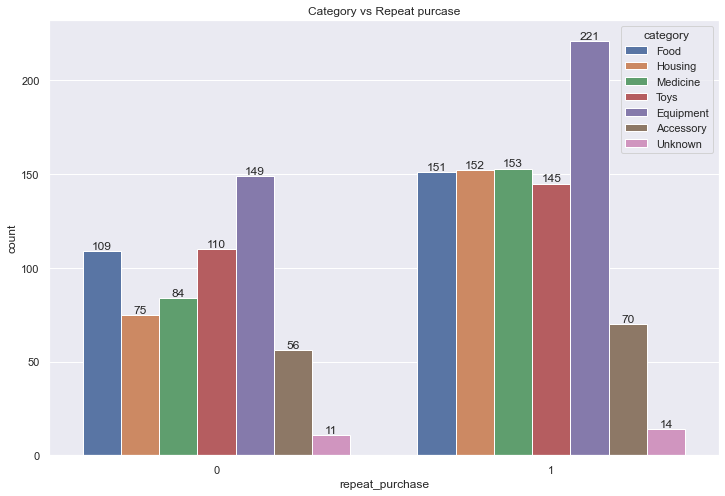

In [86]:
sns.set(style="darkgrid")
fig= plt.subplots(figsize=(12, 8))

ax = sns.countplot('repeat_purchase', data = sub_df, hue ='category')
plt.title('Category vs Repeat purcase')
for label in ax.containers:
    ax.bar_label(label)
#plt.legend()

plt.show()

As we can see in the above figuer, there are six known product categories. The amount of observation in the category of the variable repeat purchase shows that `Equipment` category has `370` observation and the second one is `Toys` counts arround `255` observations. The categories are unbalanced to some extent, we can observe two eceptions here, the `Equipment`(with maximum observation) and `Accessory`(with minimum `126` observations). The team should focus on distributing additional accessory to their customers as they are more common in order to avoid biasness on further analysis like model production.

In [61]:
sub_df.category.unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

## 2. Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

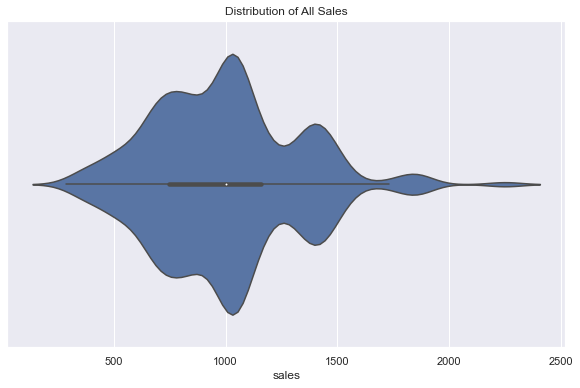

In [92]:
# distribution of of all the sales
sns.set(style="darkgrid")
fig= plt.subplots(figsize=(10, 6))

sns.violinplot(x= 'sales', data = sub_df)
plt.title('Distribution of All Sales')
# for label in ax.containers:
#     ax.bar_label(label)
#plt.legend()

plt.show()

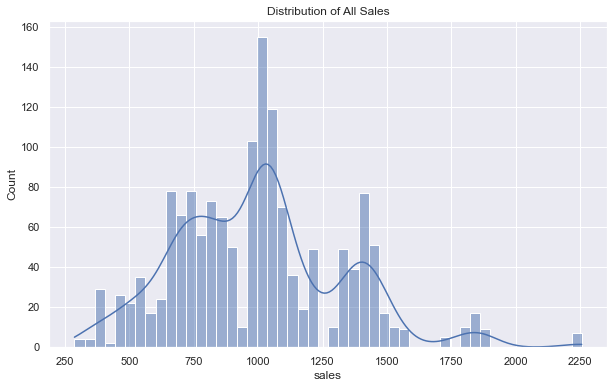

In [96]:
# distribution of of all the sales
sns.set(style="darkgrid")
fig= plt.subplots(figsize=(10, 6))

sns.histplot(x= 'sales', data = sub_df, bins = 50, kde = True)
plt.title('Distribution of All Sales')
# for label in ax.containers:
#     ax.bar_label(label)
#plt.legend()

plt.show()

### Observation
The distribution of sales is not normal. As we can see from the above figures, the distribution is not much but little bit skeweed twards left. Moreover, some sales value outliers are observed like `2250`. and the sales value at arround `1000` counts exceptionally high. Generally the sales values mostly lies between 600 and 1500 with average value of 996.61. Thus, most customer wants to purchase product at arround `1000` cost. 

### 4. Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

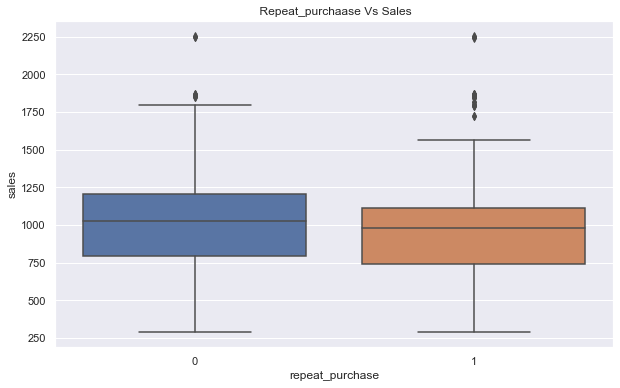

In [112]:
# relationship between repeat purchase sales
sns.set(style="darkgrid")
fig= plt.subplots(figsize=(10, 6))

#df = sub_df[['repeat_purchase', sales']]
sns.boxplot(x= 'repeat_purchase', y = 'sales', data = sub_df)
plt.title(' Repeat_purchaase Vs Sales')
# for label in ax.containers:
#     ax.bar_label(label)
#plt.legend()

plt.show()

The boxplot shown above describes the relatioship between sales and repeat purchase. Here we can observe that, there are some ouliers espetially when repeat purchase is true or 1. Additionally it shows the plot skewed towards left(negative skew) which indicates most of the sales are lying below the median in both of the repeat purachse value. Therefore, we can say that the team should address into potential customers who can affored to purchase at high cost to increase the sales. particularly in the repeat purcase of 1, it is highly skewed towards left and sales is higher when the repeat purchase is 0.

In [110]:
sub_df.groupby('repeat_purchase')['sales']

repeat_purchase
0    610849.0
1    884060.0
Name: sales, dtype: float64